In [1]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = dd.read_csv('E:/Technical_assessment/Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data_20240808.csv')

In [5]:


# Remove rows with NA values in the 'Movement' column
df_cleaned = df.dropna(subset=['Movement'])

# Convert 'Movement' column to integer type if it's not already
df_cleaned['Movement'] = df_cleaned['Movement'].astype(int)

# Filter for lane change occurrences (left-turn or right-turn)
lane_changes = df_cleaned[df_cleaned['Movement'].isin([2, 3])]

# Count the number of lane-change occurrences
num_lane_changes = lane_changes.shape[0].compute()
print(f"Number of lane-change occurrences: {num_lane_changes}")


Number of lane-change occurrences: 173329


e:\Technical_assessment\myenv\lib\site-packages\dask_expr\_collection.py:4190: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Lane_ID', 'object'))

  warnings.warn(meta_warning(meta))
e:\Technical_assessment\myenv\lib\site-packages\dask_expr\_collection.py:4190: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Section_ID', 'obje

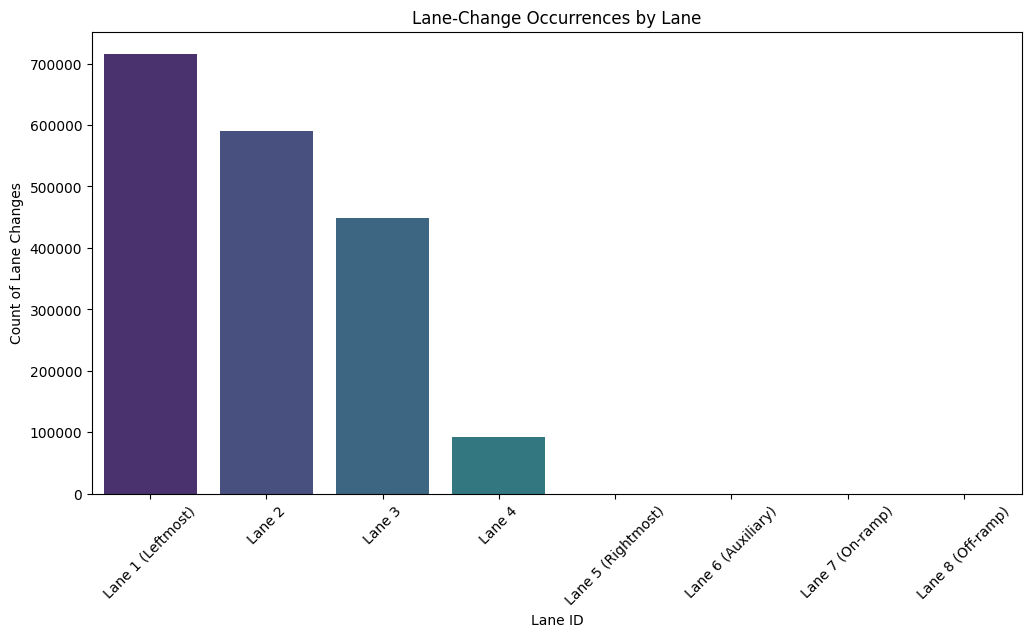

C:\Users\HP\AppData\Local\Temp\ipykernel_9364\3829707561.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pandas, x='Section_ID', order=list(section_id_mapping.values()), palette='magma')


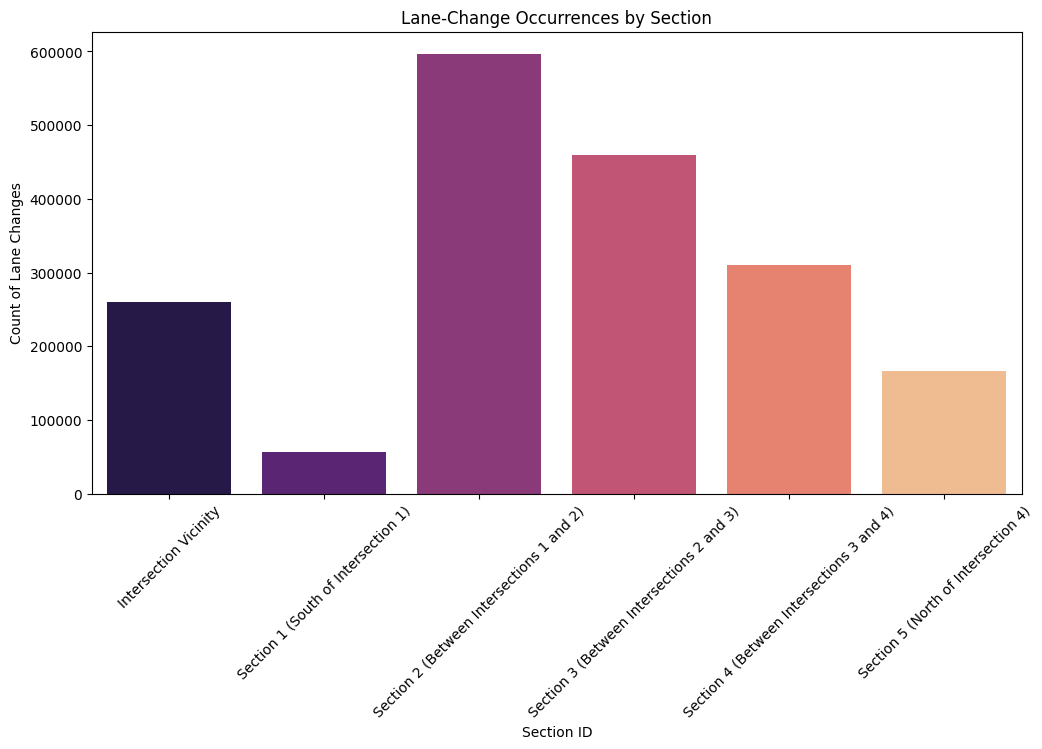

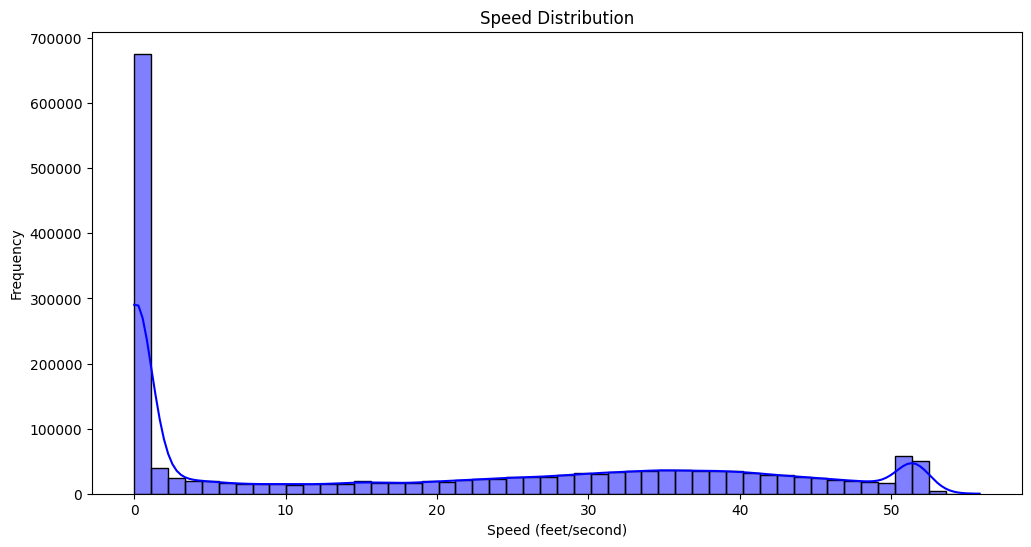

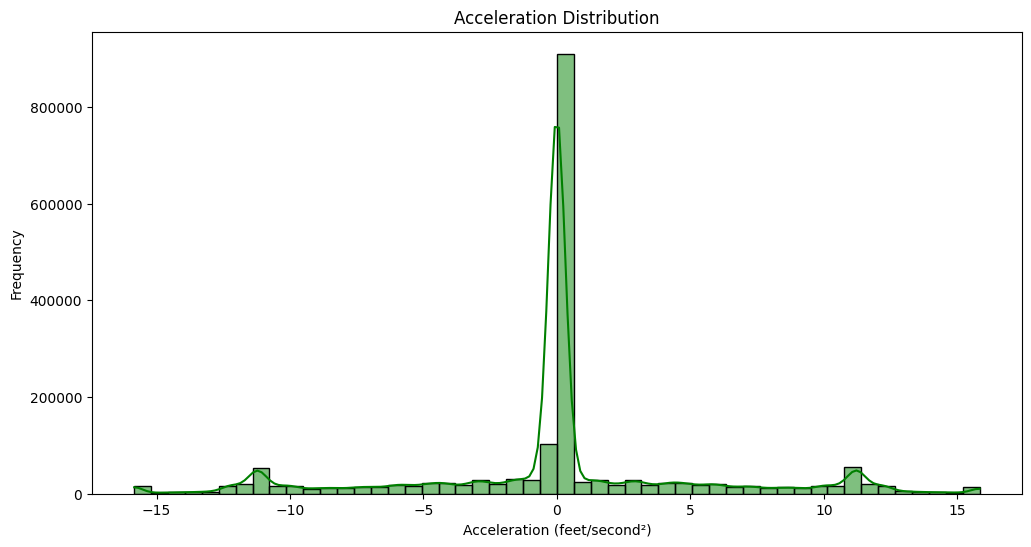

In [3]:


# Data cleaning: drop rows with missing values in important columns
df_cleaned = df.dropna(subset=['Lane_ID', 'Section_ID', 'Movement', 'v_Vel', 'v_Acc'])

# Mapping for Lane_ID
lane_id_mapping = {
    1: 'Lane 1 (Leftmost)',
    2: 'Lane 2',
    3: 'Lane 3',
    4: 'Lane 4',
    5: 'Lane 5 (Rightmost)',
    6: 'Lane 6 (Auxiliary)',
    7: 'Lane 7 (On-ramp)',
    8: 'Lane 8 (Off-ramp)'
}

# Mapping for Section_ID
section_id_mapping = {
    0: 'Intersection Vicinity',
    1: 'Section 1 (South of Intersection 1)',
    2: 'Section 2 (Between Intersections 1 and 2)',
    3: 'Section 3 (Between Intersections 2 and 3)',
    4: 'Section 4 (Between Intersections 3 and 4)',
    5: 'Section 5 (North of Intersection 4)'
}

# Mapping for Movement
movement_mapping = {
    1: 'Through (TH)',
    2: 'Left-turn (LT)',
    3: 'Right-turn (RT)'
}

# Apply mappings
df_cleaned['Lane_ID'] = df_cleaned['Lane_ID'].map(lane_id_mapping)
df_cleaned['Section_ID'] = df_cleaned['Section_ID'].map(section_id_mapping)
df_cleaned['Movement'] = df_cleaned['Movement'].map(movement_mapping)

# Convert to Pandas DataFrame for plotting
df_pandas = df_cleaned.compute()

# Handle any remaining NA values by dropping them
df_pandas = df_pandas.dropna()

# 1. Plot lane-changing occurrences by lane
plt.figure(figsize=(12, 6))
sns.countplot(data=df_pandas, x='Lane_ID', order=list(lane_id_mapping.values()), palette='viridis')
plt.title('Lane-Change Occurrences by Lane')
plt.xlabel('Lane ID')
plt.ylabel('Count of Lane Changes')
plt.xticks(rotation=45)
plt.show()

# 2. Analyze lane changes by section
plt.figure(figsize=(12, 6))
sns.countplot(data=df_pandas, x='Section_ID', order=list(section_id_mapping.values()), palette='magma')
plt.title('Lane-Change Occurrences by Section')
plt.xlabel('Section ID')
plt.ylabel('Count of Lane Changes')
plt.xticks(rotation=45)
plt.show()

# 3. Speed Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_pandas['v_Vel'], kde=True, bins=50, color='blue')
plt.title('Speed Distribution')
plt.xlabel('Speed (feet/second)')
plt.ylabel('Frequency')
plt.show()

# 4. Acceleration Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_pandas['v_Acc'], kde=True, bins=50, color='green')
plt.title('Acceleration Distribution')
plt.xlabel('Acceleration (feet/second²)')
plt.ylabel('Frequency')
plt.show()
